In [ ]:
%matplotlib inline


# permutation importance


In [1]:

from ai4water import Model
from ai4water.datasets import busan_beach
from ai4water.utils.utils import get_version_info
from ai4water.postprocessing.explain import PermutationImportance


D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
for k,v in get_version_info().items():
    print(f"{k} version: {v}")

python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os version: nt
ai4water version: 1.06
lightgbm version: 3.3.1
tcn version: 3.4.0
catboost version: 0.26
xgboost version: 1.5.0
easy_mpl version: 0.21.3
SeqMetrics version: 1.3.3
tensorflow version: 2.7.0
keras.api._v2.keras version: 2.7.0
numpy version: 1.21.0
pandas version: 1.3.4
matplotlib version: 3.4.3
h5py version: 3.5.0
sklearn version: 1.0.1
shapefile version: 2.3.0
xarray version: 0.20.1
netCDF4 version: 1.5.7
optuna version: 2.10.1
skopt version: 0.9.0
hyperopt version: 0.2.7
plotly version: 5.3.1
lime version: NotDefined
seaborn version: 0.11.2


In [3]:
data=busan_beach()
data.shape

(1446, 14)

In [13]:
# build the  model

model = Model(
    model="XGBRegressor",
    split_random=True,
    seed=2809,
    val_fraction=0.0,
    verbosity=0)

# train the model

_ = model.fit(data=data)


model.evaluate_on_test_data(data=data, metrics=["r2", "r2_score", "rmse"])

{'r2': 0.8336250314308812,
 'r2_score': 0.7526565938320161,
 'rmse': 4477451.741843463}

In [5]:

# get the data

x_test, y_test = model.test_data()
x_test.shape, y_test.shape

((66, 13), (66, 1))

In [14]:
pimp = PermutationImportance(
    model.predict,
    x_test,
    y_test.reshape(-1, ),
    feature_names=model.input_features,
    n_repeats=1000,
    scoring = "r2",
    save=False,
)


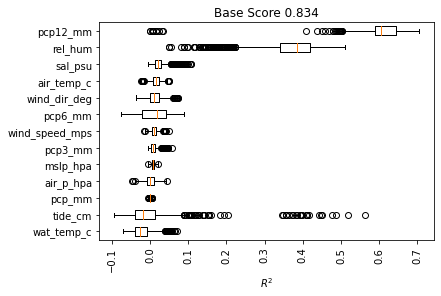

In [15]:

# plot permutatin importance of each feature  as box-plot
_ = pimp.plot_1d_pimp()


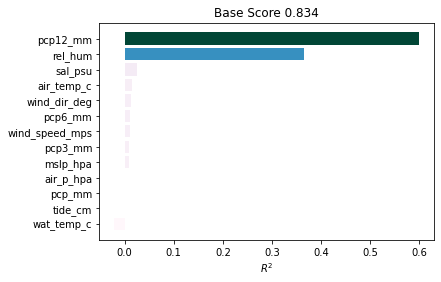

In [17]:
_ = pimp.plot_1d_pimp(plot_type="barchart")